In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from math import sqrt

import scipy, matplotlib
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

mainData = pd.read_csv('clean_filter_dataframe.csv')
sb.set() # set the default Seaborn style for graphics
mainData.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Fighting,Misc,Platform.1,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,...,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000
mean,2007.369579,0.260723,0.139294,0.037282,0.048949,0.486453,70.496872,28.914995,7.216677,129.731607,...,0.058252,0.055016,0.061704,0.012945,0.075944,0.083495,0.115426,0.041640,0.163970,0.037972
std,4.069156,0.276439,0.183665,0.117220,0.068543,0.465979,12.903368,18.224541,1.381018,426.797953,...,0.234245,0.228036,0.240644,0.113049,0.264937,0.276659,0.319570,0.199786,0.370288,0.191149
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,21.000000,3.000000,0.500000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.070000,0.020000,0.000000,0.010000,0.140000,63.000000,15.000000,6.500000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.160000,0.060000,0.000000,0.020000,0.320000,72.000000,25.000000,7.500000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,0.360000,0.190000,0.010000,0.060000,0.690000,80.000000,40.000000,8.200000,77.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,1.820000,1.580000,1.490000,1.180000,2.070000,98.000000,106.000000,9.600000,10665.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Non-linear Regression Model Function

In [2]:
def non_linear_regression(xData,yData):
    def func(x, a, b, Offset): # Sigmoid A With Offset from zunzun.com
        return  1.0 / (1.0 + np.exp(-a * (x-b))) + Offset
    
    
    # function for genetic algorithm to minimize (sum of squared error)
    def sumOfSquaredError(parameterTuple):
        warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
        val = func(xData, *parameterTuple)
        return np.sum((yData - val) ** 2.0)
    
    
    def generate_Initial_Parameters():
        # min and max used for bounds
        maxX = max(xData)
        minX = min(xData)
        maxY = max(yData)
        minY = min(yData)
    
        parameterBounds = []
        parameterBounds.append([minX, maxX]) # search bounds for a
        parameterBounds.append([minX, maxX]) # search bounds for b
        parameterBounds.append([0.0, maxY]) # search bounds for Offset
    
        # "seed" the numpy random number generator for repeatable results
        result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
        return result.x
    
    # generate initial parameter values
    geneticParameters = generate_Initial_Parameters()
    
    # curve fit the test data
    fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)
    
    print('Parameters', fittedParameters)
    
    modelPredictions = func(xData, *fittedParameters) 
    
    absError = modelPredictions - yData
    
    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(yData))
    print('MSE:', MSE)
    print('R^2:', Rsquared)
    
    
    
    ##########################################################
    # graphics output section
    def ModelAndScatterPlot(graphWidth, graphHeight):
        f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
        axes = f.add_subplot(111)
    
        # first the raw data as a scatter plot
        axes.plot(xData, yData,  'D')
    
        # create data for the fitted equation plot
        xModel = np.linspace(min(xData), max(xData))
        yModel = func(xModel, *fittedParameters)
    
        # now the model as a line plot 
        axes.plot(xModel, yModel)
    
        plt.show()
        plt.close('all') # clean up after using pyplot
    
    graphWidth = 800
    graphHeight = 600
    ModelAndScatterPlot(graphWidth, graphHeight)




In [3]:
UserScore = mainData["User_Score"]
CriticsScore = mainData['Critic_Score']
GlobalSales = mainData['Global_Sales']
YearofRelease = mainData['Year_of_Release']

Parameters [2.00575482e+03 2.01505035e+03 4.58189853e-01]
MSE: 0.2528927535972762
R^2: -0.16492409710334588


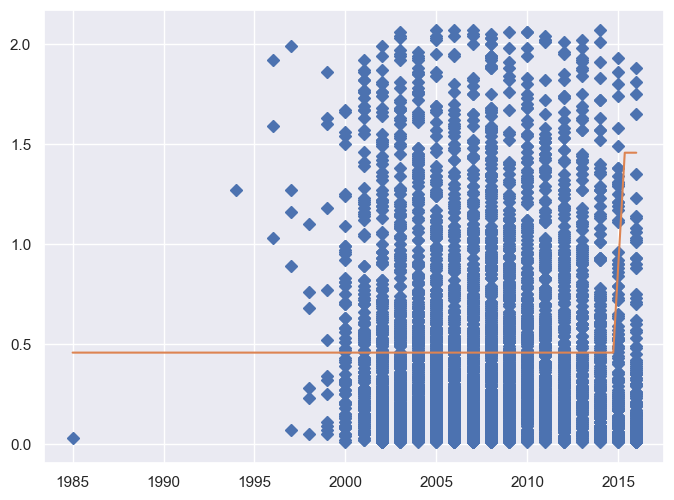

In [4]:
non_linear_regression(YearofRelease, GlobalSales)

Parameters [47.92838614 94.00616346  0.48273061]
MSE: 0.21628340043324512
R^2: 0.0037130705240834283


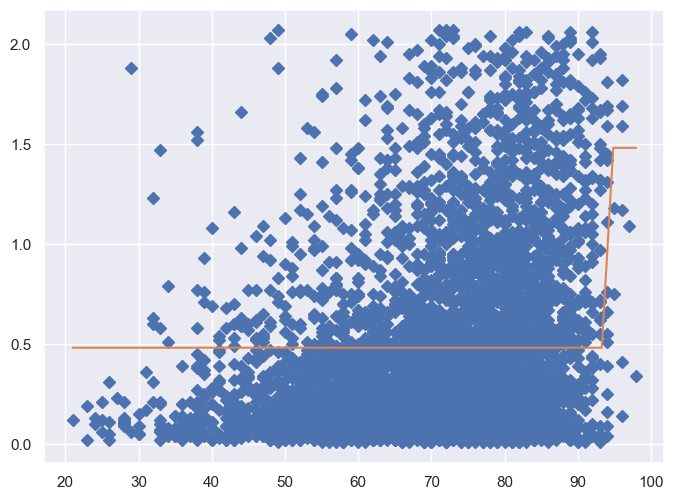

In [5]:
non_linear_regression(CriticsScore, GlobalSales)

Parameters [ 0.27466792 11.48732642  0.24348172]
MSE: 0.21330329476012944
R^2: 0.017440616533785036


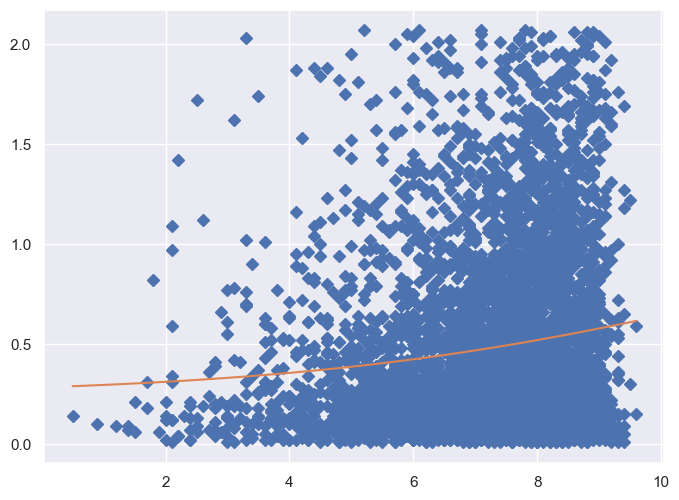

In [6]:
non_linear_regression(UserScore, GlobalSales)